# Guided Project: Finding the Best Markets to Advertise In

Solution notebook can be referenced [here](https://github.com/dataquestio/solutions/blob/master/Mission310Solutions.ipynb).

## Finding the Best Two Markets to Advertise In

Let's assume that we're working for an an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement. 

**Our goal in this project is to find out the two best markets to advertise our product in.**

## Understanding the Data

We can try to search existing data that might be relevant for our purpose. One good candidate is the data from [freeCodeCamp's 2017 New Coder Survey](https://medium.freecodecamp.org/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969). 

[freeCodeCamp](https://www.freecodecamp.org/) is a free e-learning platform that offers courses on web development. Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

The survey data is publicly available in this [GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey).

Link to the cleaned dataset is [here](https://github.com/freeCodeCamp/2017-new-coder-survey/blob/master/clean-data/2017-fCC-New-Coders-Survey-Data.csv).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fcc_survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory = False)
fcc_survey.shape

(18175, 136)

In [3]:
fcc_survey.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
fcc_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB


In [5]:
list(fcc_survey.columns)

['Age',
 'AttendedBootcamp',
 'BootcampFinish',
 'BootcampLoanYesNo',
 'BootcampName',
 'BootcampRecommend',
 'ChildrenNumber',
 'CityPopulation',
 'CodeEventConferences',
 'CodeEventDjangoGirls',
 'CodeEventFCC',
 'CodeEventGameJam',
 'CodeEventGirlDev',
 'CodeEventHackathons',
 'CodeEventMeetup',
 'CodeEventNodeSchool',
 'CodeEventNone',
 'CodeEventOther',
 'CodeEventRailsBridge',
 'CodeEventRailsGirls',
 'CodeEventStartUpWknd',
 'CodeEventWkdBootcamps',
 'CodeEventWomenCode',
 'CodeEventWorkshops',
 'CommuteTime',
 'CountryCitizen',
 'CountryLive',
 'EmploymentField',
 'EmploymentFieldOther',
 'EmploymentStatus',
 'EmploymentStatusOther',
 'ExpectedEarning',
 'FinanciallySupporting',
 'FirstDevJob',
 'Gender',
 'GenderOther',
 'HasChildren',
 'HasDebt',
 'HasFinancialDependents',
 'HasHighSpdInternet',
 'HasHomeMortgage',
 'HasServedInMilitary',
 'HasStudentDebt',
 'HomeMortgageOwe',
 'HoursLearning',
 'ID.x',
 'ID.y',
 'Income',
 'IsEthnicMinority',
 'IsReceiveDisabilitiesBenefits'

To understand what each column describes, we load in the initial survey questions from the `raw-data` folder of the [repository](https://github.com/freeCodeCamp/2017-new-coder-survey).

In [6]:
fcc_survey_raw_p1 = pd.read_csv('2017-new-coder-survey-part-1.txt', delimiter = ',')
fcc_survey_raw_p1.shape

(20089, 101)

In [7]:
list(fcc_survey_raw_p1.columns)

['#',
 'Are you already working as a software developer?',
 'Is this your first software development job?',
 'Before you got this job, how many months did you spend looking for a job?',
 'Would you prefer to...',
 'Full-Stack Web Developer',
 'Back-End Web Developer',
 '  Front-End Web Developer',
 '  Mobile Developer',
 '  DevOps / SysAdmin',
 '  Data Scientist',
 '  Quality Assurance Engineer',
 '  User Experience Designer',
 '  Product Manager',
 'Game Developer',
 'Information Security',
 'Data Engineer',
 'Other',
 'When do you plan to start applying for developer jobs?',
 'About how much money do you expect to earn per year at your first developer job (in US Dollars)?',
 'Would you prefer to work...',
 'Are you willing to relocate for a job?',
 'freeCodeCamp',
 'EdX',
 'Coursera',
 'Khan Academy',
 'Pluralsight / Code School',
 'Codecademy',
 'Udacity',
 'Udemy',
 'Code Wars',
 'The Odin Project',
 'Treehouse',
 'Lynda.com',
 'Stack Overflow',
 'W3Schools',
 'Skillcrush',
 'Hacke

## Checking for Sample Representativity

As we mentioned earlier, most of the courses we offer are on web and mobile development, but we also cover many other domains, like data science, game development, etc. For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:

* Where are these new coders located.
* What are the locations with the greatest number of new coders.
* How much money new coders are willing to spend on learning.

Before starting to analyze the sample data we have, we need to clarify whether it's representative for our population of interest and it has the right categories of people for our purpose.

***Figure out whether the sample we have is representative for our population of interest.***
- The `JobRoleInterest` column describes for every participant the role(s) they'd be interested in working.
- Generate a frequency distribution table for this column. Take percentages instead of absolute frequencies.
- Analyze the table.
    * Are people interested in only one subject or they can be interested in more than one subject?
    * If most people are interested in more than one subject, is this sample still representative?
    * The focus of our courses is on web and mobile development. How many people are interested in at least one of these two subjects?
- Generate at least one graph while you're working on these steps to help the reader understand easier what you're doing.
- Use Markdown cells to explain the readers what you're doing.

In [8]:
job_interest_freq = fcc_survey['JobRoleInterest'].value_counts(normalize = True, dropna = False)
pd.DataFrame(round(job_interest_freq*100,2))[:20]

,JobRoleInterest
NaN,61.53
Full-Stack Web Developer,4.53
Front-End Web Developer,2.48
Data Scientist,0.84
Back-End Web Developer,0.78
Mobile Developer,0.64
Game Developer,0.63
Information Security,0.51
"Full-Stack Web Developer, Front-End Web Developer",0.35
"Front-End Web Developer, Full-Stack Web Developer",0.31


In [9]:
job_interest_freq_exNA = fcc_survey['JobRoleInterest'].value_counts(normalize = True)
pd.DataFrame(round(job_interest_freq_exNA*100,2))[:20]

,JobRoleInterest
Full-Stack Web Developer,11.77
Front-End Web Developer,6.44
Data Scientist,2.17
Back-End Web Developer,2.03
Mobile Developer,1.67
Game Developer,1.63
Information Security,1.32
"Full-Stack Web Developer, Front-End Web Developer",0.92
"Front-End Web Developer, Full-Stack Web Developer",0.80
Product Manager,0.79


It appears that most people did not repond in the survey with respect to their job interest. However, for those who did, we can observe that:

1. Web developer was found overwhelmingly popular in the surveyed population. 
2. Some responses expressed interests in other jobs, including *Data Scientist*, *Mobile Developer*, and *Game Developer*. 
3. There were responses indicating interests in multiple fields and subjects.

We will primarily focus on ***Web Development*** and ***Mobile Development*** for our courses. 

In [10]:
# First remove missing values

interest_not_missing = fcc_survey['JobRoleInterest'].notnull()
job_interest_exNA = fcc_survey.loc[interest_not_missing , 'JobRoleInterest'].copy()

job_interest_exNA.head()

1                             Full-Stack Web Developer
2      Front-End Web Developer, Back-End Web Develo...
3      Front-End Web Developer, Full-Stack Web Deve...
4    Full-Stack Web Developer, Information Security...
6                             Full-Stack Web Developer
Name: JobRoleInterest, dtype: object

In [11]:
web_and_mobile = job_interest_exNA.str.contains(
    'web developer|mobile developer', case = False).value_counts(normalize = True)*100
web_and_mobile

True     86.270023
False    13.729977
Name: JobRoleInterest, dtype: float64

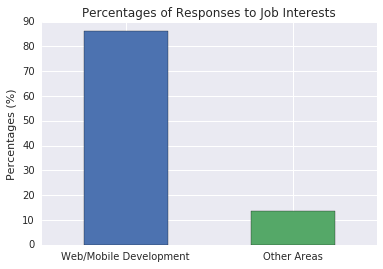

In [12]:
%matplotlib inline

web_and_mobile.index = ['Web/Mobile Development', 'Other Areas']
web_and_mobile.plot.bar(rot = 0)

plt.title('Percentages of Responses to Job Interests')
plt.ylabel('Percentages (%)')

In [13]:
# Note that the multiple job interests, if any, are separated by commas
job_interest_exNA.str.split(', ').sample(10, random_state = 4)

3640     [  Front-End Web Developer, Back-End Web Devel...
8683     [  DevOps / SysAdmin,   Data Scientist,   Fron...
2662     [  Front-End Web Developer, Back-End Web Devel...
6341          [Full-Stack Web Developer,   Data Scientist]
4767     [  Front-End Web Developer,   Product Manager,...
14921    [Data Engineer, Information Security, Back-End...
2839     [  Front-End Web Developer, Full-Stack Web Dev...
915      [  Data Scientist, Game Developer, Information...
1525                    [Data Engineer,   Product Manager]
6943                                      [Game Developer]
Name: JobRoleInterest, dtype: object

In [14]:
# Note that the multiple job interests, if any, are separated by commas

num_of_job_interested = job_interest_exNA.str.split(', ').apply(len).value_counts(normalize = True)*100
num_of_job_interested

1     31.650458
3     15.889588
4     15.217391
5     12.042334
2     10.883867
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
12     0.300343
11     0.185927
13     0.028604
Name: JobRoleInterest, dtype: float64

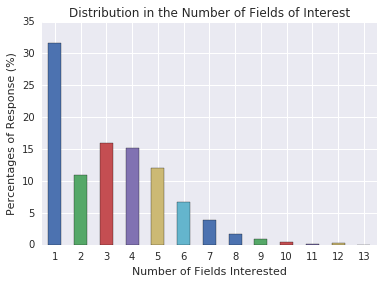

In [15]:
%matplotlib inline

num_of_job_interested.sort_index().plot.bar(rot = 0)

plt.title('Distribution in the Number of Fields of Interest')
plt.xlabel('Number of Fields Interested')
plt.ylabel('Percentages of Response (%)')

In the above analysis, we found that:

1. Over 85 % of the responses, if present, indicated interests in web or mobile development positions. Thus, the survey dataset should be considered relevant to our study. 
2. While most respondents (> 30 %) only expressed interest in one field, we should consider those with over one type of job interests as well provided that we are offering online education courses across multiple domains.

## New Coders - Locations and Densities

* To make sure you're working with a representative sample, drop all the rows where participants didn't answer what role they are interested in. Where a participant didn't respond, we can't know for sure what their interests are, so it's better if we leave out this category of participants.

* Generate a frequency table for the `CountryLive` variable.
    - Generate both absolute and relative frequencies.
    - Analyze the results.
    - Based on the results, what are the two markets you'd choose for advertisement?
    - Can we stop the analysis here, or we need to go more in depth?

In [16]:
country_with_interest = fcc_survey.loc[interest_not_missing, 'CountryLive']
absolute_country_freq = country_with_interest.value_counts()
percentage_country_freq = round(country_with_interest.value_counts(normalize = True)*100,2)

In [17]:
absolute_country_freq[:10]

United States of America    3125
India                        528
United Kingdom               315
Canada                       260
Poland                       131
Brazil                       129
Germany                      125
Australia                    112
Russia                       102
Ukraine                       89
Name: CountryLive, dtype: int64

In [18]:
percentage_country_freq[:10]

United States of America    45.70
India                        7.72
United Kingdom               4.61
Canada                       3.80
Poland                       1.92
Brazil                       1.89
Germany                      1.83
Australia                    1.64
Russia                       1.49
Ukraine                      1.30
Name: CountryLive, dtype: float64

In [19]:
country_live_freq_table = pd.DataFrame(
    {'Absolute Counts': absolute_country_freq, 
     'Percentages (%)': percentage_country_freq})

country_live_freq_table[:20]

,Absolute Counts,Percentages (%)
United States of America,3125,45.70
India,528,7.72
United Kingdom,315,4.61
Canada,260,3.80
Poland,131,1.92
Brazil,129,1.89
Germany,125,1.83
Australia,112,1.64
Russia,102,1.49
Ukraine,89,1.30


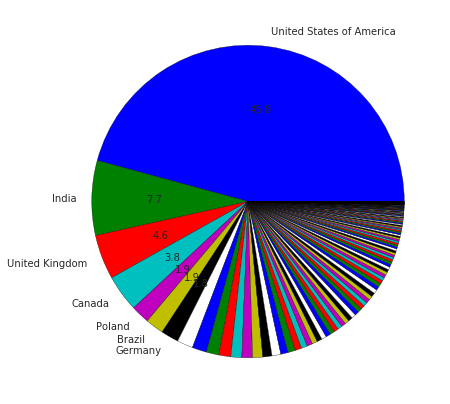

In [20]:
%matplotlib inline

countries = country_live_freq_table.index
pie_labels = [c if country_live_freq_table.loc[c,'Percentages (%)'] > 1.8 else '' for c in countries]
 
fig, ax = plt.subplots(figsize = (7,7))

def my_autopct(pct):
    return ('%.1f' % pct) if pct > 1.8 else ''

ax.pie(country_live_freq_table['Percentages (%)'], labels = pie_labels, autopct = my_autopct)
plt.show()


Based on these results, over 40 % of those expressed job interests were residing in the *United States*, making it undoubtedly the primary target for advertising. 
The second largest market was *India*, but only with a percentage of 7.7 %, which was far lower than that of the *United States* and not substantially different from the latter countries (i.e., *United Kingdom* & *Canada*). 

## Spending Money for Learning

Previously, we found useful information about the location of new coders, and what are the countries where new coders live, but we need to go more in depth with our analysis before taking a decision. We can continue by figuring out how much money new coders are actually willing to spend on learning. Advertising within markets where most people are only willing to learn for free is extremely unlikely to be profitable for us.

The `MoneyForLearning` column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Our company sells subscriptions at a price of $59 per month, and for this reason we're interested in finding out how much money each student spends per month.

It also seems like a good idea to narrow down our analysis to only four countries: the US, India, the United Kingdom, and Canada. Two reasons for this decision are:

- These are the countries having the highest absolute frequencies in our sample, which means we have a decent amount of data for each.
- Our courses are written in English, and English is an official language in all these four countries. The more people that know English, the better our chances to target the right people with our ads.

***Tasks:***

- Create a new column that describes the amount of money a student has spent per month (at the moment they completed the survey).
    * You'll need to divide the `MoneyForLearning` column to the `MonthsProgramming` column.
    * Some students answered that they had been learning to code for 0 months (it might be that they had just started when they completed the survey). To avoid dividing by 0, replace all the values of 0 with 1.
    
- Find out how many null values there are in the new column (the column describing the amount of money students spend per month).

- Keep only the rows that don't have a null value for the new column.

- Remove also any rows that have null values in the CountryLive column.

- Group the remaining data by the CountryLive column and find out how much money a student spends on average each month in the US, India, the United Kingdom and Canada.

    * You can use the DataFrame.groupby() method.
    * As a summary metric, we recommend choosing the mean to take into account all values in the distributions. You can also compute the median or the mode to see how they compare with the mean.
    * Analyze the results. Is there anything in the results that looks off?

In [21]:
# There are both missing values and 0 months
fcc_survey['MonthsProgramming'].value_counts(dropna = False)[:10]

 1.0     1697
 12.0    1497
 2.0     1338
 3.0     1333
 6.0     1330
 24.0    1191
NaN      1091
 36.0     863
 4.0      732
 5.0      621
 0.0      578
 48.0     520
 18.0     465
 8.0      451
 60.0     380
 10.0     357
Name: MonthsProgramming, dtype: int64

In [22]:
fcc_survey['MonthsProgramming'].replace({0:1}, inplace = True)
fcc_survey['MonthsProgramming'].value_counts(dropna = False)[:10]

 1.0     2275
 12.0    1497
 2.0     1338
 3.0     1333
 6.0     1330
 24.0    1191
NaN      1091
 36.0     863
 4.0      732
 5.0      621
 48.0     520
 18.0     465
 8.0      451
 60.0     380
 10.0     357
Name: MonthsProgramming, dtype: int64

In [23]:
fcc_survey['monthly_spending'] = fcc_survey['MoneyForLearning']/fcc_survey['MonthsProgramming']
fcc_survey['monthly_spending'].isnull().sum()

1995

In [24]:
top_four = ['United States of America', 'India', 'United Kingdom', 'Canada']
country_mask = fcc_survey['CountryLive'].isin(top_four)

fcc_survey.loc[interest_not_missing & country_mask, 'CountryLive'].value_counts()

United States of America    3125
India                        528
United Kingdom               315
Canada                       260
Name: CountryLive, dtype: int64

In [25]:
# There are still missing values for the four countries we are interested in.
fcc_survey.loc[interest_not_missing & country_mask, 'monthly_spending'].isnull().sum()

313

In [26]:
spending_mask = fcc_survey['monthly_spending'].notnull()

spending_by_country = fcc_survey[interest_not_missing & country_mask & spending_mask].copy()
spending_by_country.sample(5, random_state = 3)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,monthly_spending
5136,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,100.000000
13884,29.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.000000
17888,35.0,0.0,NaN,NaN,NaN,NaN,3.0,"between 100,000 and 1 million",NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,33.333333
9569,36.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,8.333333
7963,33.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,18.181818


In [27]:
# The median and mode did not give useful information due to large presence of free-learners.

from statistics import mean, median, mode

spending_by_country.groupby('CountryLive')['monthly_spending'].agg(
    [mean, median, mode]).sort_values('mean', ascending = False).applymap(lambda x: round(x,2))

,mean,median,mode
CountryLive,,,
United States of America,228.00,3.33,0.0
India,135.10,0.00,0.0
Canada,113.51,0.00,0.0
United Kingdom,45.53,0.00,0.0


##  Dealing with Extreme Outliers

The results for the United Kingdom and Canada are surprisingly low relative to the values we see for India. If we considered a few socio-economical metrics (like GDP per capita), we'd intuitively expect people in the UK and Canada to spend more on learning than people in India.

It might be that we don't have have enough representative data for the United Kingdom, Canada, and India, or we have some outliers (maybe coming from wrong survey answers) making the mean too big for India, or too low for the UK and Canada. Or it might be that the results are correct.

- Generate four box plots on the same figure to visualize for each country (the US, India, the United Kingdom, Canada) the distribution of the variable that describes how much money each participant had spent per month.

    * Can you spot extreme outliers for India, Canada or the United Kingdom?
    * If not, what extreme outliers can you spot?
    
- Eliminate the extreme outliers.

- Recompute the mean values, just like we did in the previous screen: group the data by the `CountryLive` column, and then find out how much money a student spends on average each month in the US, India, the United Kingdom and Canada.

    * If the mean values still look off, look more for extreme outliers. For instance, you can find a couple of persons in India who spend \$5000 per month. Isolate these respondents and examine their answers to other questions in the survey to figure out whether these big expenses with learning are justified — you can try to find out whether they attended any bootcamp, which might justify the large amount of money spent.
    * If you find more extreme outliers, remove them, and recompute the mean values.
    * If you get stuck, you can always sneak a look at the solution notebook.
    
- Is it clear enough at this point what are the two best countries to choose for advertisement?

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



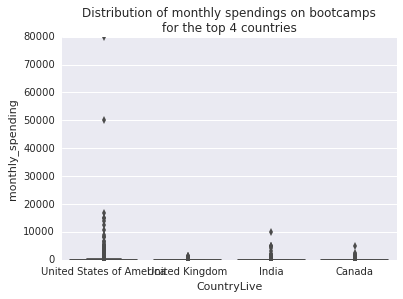

In [28]:
from seaborn import boxplot

boxplot(data = spending_by_country, x = 'CountryLive', y = 'monthly_spending')
plt.title('Distribution of monthly spendings on bootcamps\nfor the top 4 countries')

While we spotted a few higher spending values from the UK, India and Canada, there was no strong evidence suggesting they were necessarily outliers that needed to be removed, comparing to those values in the US. However, one might immediately observe that there were two extremely high spending values - \$50000 & \$80000/month, which was unlikely reasonable. Thus, we decided to remove them from the dataset.

In [29]:
spending_by_country_cleaned = spending_by_country[spending_by_country.monthly_spending < 30000].copy()
spending_by_country_cleaned['monthly_spending'].describe()

count     3913.000000
mean       163.868289
std        795.057588
min          0.000000
25%          0.000000
50%          2.000000
75%         38.461538
max      16666.666667
Name: monthly_spending, dtype: float64

In [30]:
spending_by_country_cleaned.groupby('CountryLive')['monthly_spending'].agg(
    [mean, median, mode]).sort_values('mean', ascending = False).applymap(lambda x: round(x,2))

,mean,median,mode
CountryLive,,,
United States of America,183.80,3.33,0.0
India,135.10,0.00,0.0
Canada,113.51,0.00,0.0
United Kingdom,45.53,0.00,0.0


/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



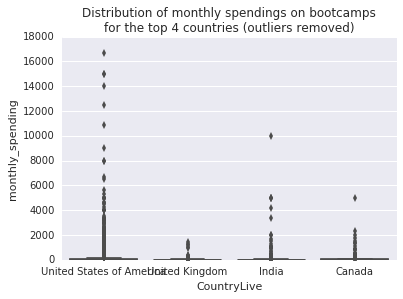

In [31]:
boxplot(data = spending_by_country_cleaned, x = 'CountryLive', y = 'monthly_spending')
plt.title('Distribution of monthly spendings on bootcamps\nfor the top 4 countries (outliers removed)')

In [32]:
# helper function to remove empty columns for an easy view

def col_filter(df):
    
    cols = df.columns
    useful_cols = []
    
    for col in cols:
        
        if df[col].notnull().sum() > 0: useful_cols.append(col)
    
    return df[useful_cols]

In [33]:
# Look into outliers from India - potentially those who spent > $4000/month?

india_outliers = spending_by_country_cleaned[
    (spending_by_country_cleaned.CountryLive == 'India') & (spending_by_country_cleaned.monthly_spending > 4000)]

col_filter(india_outliers)

,Age,AttendedBootcamp,CityPopulation,CodeEventConferences,CodeEventGameJam,CodeEventHackathons,CodeEventNone,CodeEventWorkshops,CommuteTime,CountryCitizen,...,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeFCC,YouTubeGoogleDev,YouTubeLearnCode,YouTubeMIT,YouTubeTheNewBoston,monthly_spending
1728,24.0,0.0,"between 100,000 and 1 million",NaN,1.0,NaN,NaN,NaN,NaN,India,...,1.0,bachelor's degree,Computer Programming,NaN,1.0,NaN,NaN,NaN,NaN,5000.000000
7989,28.0,0.0,"between 100,000 and 1 million",1.0,NaN,NaN,NaN,1.0,15 to 29 minutes,India,...,NaN,bachelor's degree,Aerospace and Aeronautical Engineering,2500.0,1.0,NaN,NaN,NaN,NaN,5000.000000
8126,22.0,0.0,more than 1 million,NaN,1.0,1.0,NaN,NaN,NaN,India,...,NaN,bachelor's degree,Electrical and Electronics Engineering,10000.0,NaN,1.0,NaN,1.0,1.0,5000.000000
13398,19.0,0.0,more than 1 million,NaN,NaN,NaN,1.0,NaN,NaN,India,...,1.0,bachelor's degree,Computer Science,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000
15587,27.0,0.0,more than 1 million,NaN,NaN,1.0,NaN,NaN,15 to 29 minutes,India,...,1.0,bachelor's degree,Communications,25000.0,NaN,1.0,1.0,1.0,NaN,4166.666667


In [34]:
# While none of these people completed a bootcamp, which was likely costly, they did attend at least certain event(s) 
# for coding education.
# For the person spent $10000 per month

indian_top_spender = india_outliers.loc[13398]
indian_top_spender[indian_top_spender.notnull()]

Age                                                                19
AttendedBootcamp                                                    0
CityPopulation                                    more than 1 million
CodeEventNone                                                       1
CountryCitizen                                                  India
CountryLive                                                     India
EmploymentStatus                                       Unable to work
ExpectedEarning                                                100000
Gender                                                           male
HasDebt                                                             0
HasFinancialDependents                                              0
HasHighSpdInternet                                                  0
HasServedInMilitary                                                 0
HoursLearning                                                      30
ID.x                

Upon inspecting the outlier in detail, we found that the expensive \$10000 spending might be the cost for his/her education, potentially an online CS degree. 

##  Choosing the Two Best Markets

In [35]:
spending_by_country['CountryLive'].value_counts(normalize = True)*100

United States of America    74.916986
India                       11.826309
United Kingdom               7.126437
Canada                       6.130268
Name: CountryLive, dtype: float64

1) *United States*  
2) *India*